In [14]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../..')
import omama as O
import sklearn

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
odl = O.OutlierDetectorLite()

In [3]:
data_imgs = odl.load_data(DATASET='A')

In [4]:
gt = odl.load_ground_truth('A')

In [5]:
len(data_imgs)

100

In [6]:
binary_bin_feats = O.Features.get_features(data=data_imgs, feature_type='hist', norm_type='minmax', bins=5)

In [7]:
bad_images = []
bad_indexes_found = []
paths = []
for i, binary in enumerate(binary_bin_feats):
    if binary[4] > 15000 or binary[1] < 2000:
        print(i, binary)
        bad_images.append(data_imgs[i])
        paths.append(data_imgs[i].filePath)
        bad_indexes_found.append(i)

27 [2647021   19223  683399  883726  157347]
47 [2837801   15013  223174 1208486  106242]
48 [2977350  921716   65750  297245  128655]
61 [2378460  120668 1505619  274960  111009]
63 [2244929  124909 1386825  497029  137024]
90 [2056989  730755 1097179  294724  211069]


In [8]:
np.where(np.array(gt)>0)

(array([27, 38, 47, 48, 61, 63, 81, 90]),)

In [9]:
len(bad_images)

6

In [10]:
bad_indexes_found

[27, 47, 48, 61, 63, 90]

In [11]:
preds = O.DataHelper.build_gt(100, bad_indexes_found)

In [13]:
np.where(preds > 0)

(array([27, 47, 48, 61, 63, 90]),)

In [15]:
f1 = sklearn.metrics.f1_score(gt, preds)

In [16]:
f1

0.8571428571428571

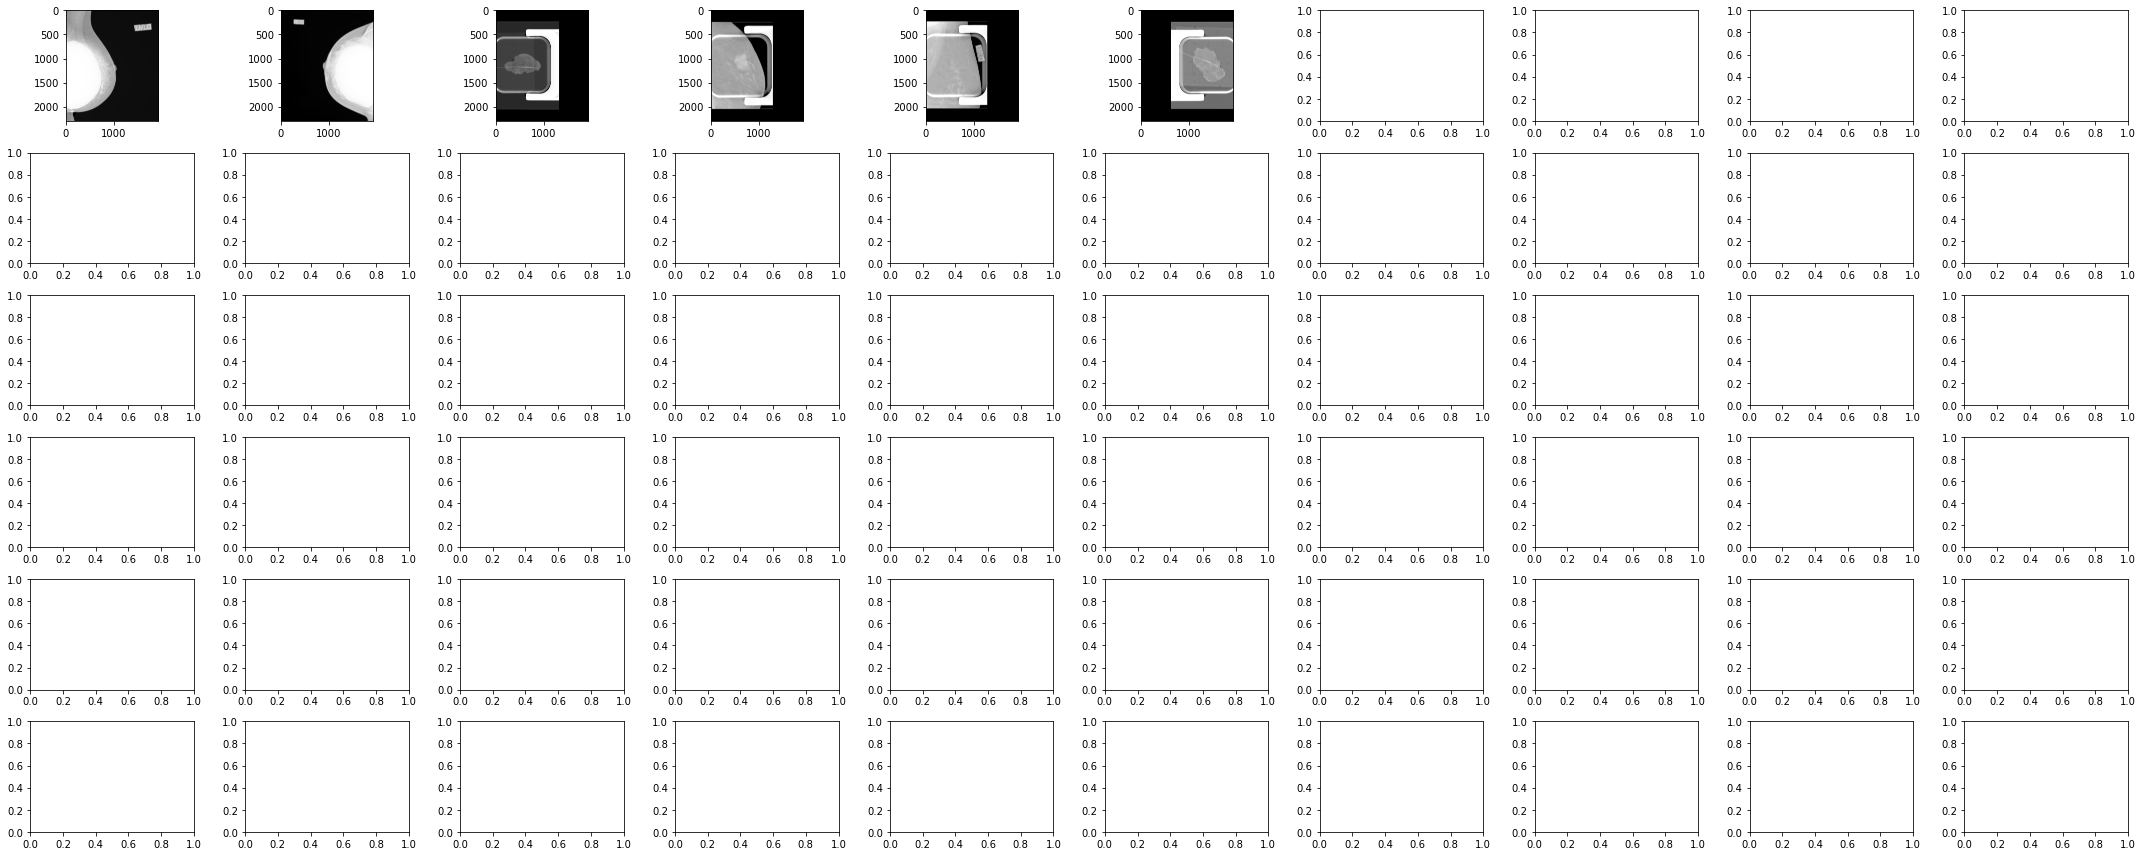

In [15]:
O.DataHelper.view_grid(bad_images, ncols=10)